## GALGAL

In [22]:
# install dependencies

import emcee
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import os, sys, shutil
import pandas as pd
import sklearn.metrics as slm

pkdir = "/pscratch/sd/s/sbrisin/cibcmass/hmvec"
sys.path.insert(0,pkdir)

#import hmvec as hm
from hmvec import hmvec as hm 
from scipy.interpolate import interp1d

.4-.5

In [23]:
zs = np.linspace(0.4,.5,20)
ms = np.geomspace(1e10,1e17,200)
ks = np.geomspace(1e-4,100,1001)
hcos = hm.HaloModel(zs,ks,ms=ms)

hcos.add_hod(name="CMASS",mthresh=10**12+zs*0.)

In [24]:
# prepping all the data
data = pd.read_csv("crosses.csv")
cgg = data['cggb']
l =  data['l']
z = data['z']
cgg45 = cgg[z == '.4-.5']
l45 = l[z == '.4-.5']
e = data['err']
e45 = e[z == '.4-.5']
cgg56 = cgg[z == '.5-.6']
l56 = l[z == '.5-.6']
cgg68 = cgg[z == '.6-.8']
l68 = l[z == '.6-.8']
e56 = e[z == '.5-.6']
e68 = e[z == '.6-.8']

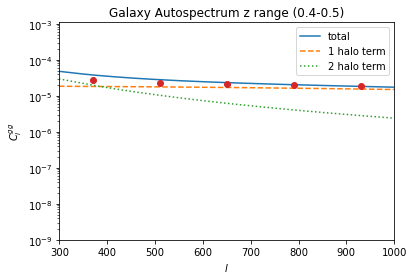

In [25]:
ells = np.arange(3000)

# 3D cross-spectra of gal x galaxies at (zs, ks)
Pgg_1h = hcos.get_power_1halo('CMASS') # put this back in hertz
Pgg_2h = hcos.get_power_2halo('CMASS') # put this back in hertz
# Project to 2D to get the Cls
Cl_gg_1h = hcos.C_gg(ells, hcos.zs, hcos.ks, Pgg_1h, gzs = zs, gdndz= np.ones_like(zs))
Cl_gg_2h = hcos.C_gg(ells, hcos.zs, hcos.ks, Pgg_2h, gzs = zs, gdndz= np.ones_like(zs))
# Plot
plt.plot(Cl_gg_1h + Cl_gg_2h, label='total', ls='-')
plt.plot(Cl_gg_1h, label='1 halo term', ls='--')
plt.plot(Cl_gg_2h, label='2 halo term', ls=':')
plt.errorbar(l45,cgg45, yerr = e45, fmt = 'o')

plt.xlabel(r'$l$')
plt.yscale('log')
plt.xlim([300,1000])

plt.legend()
plt.ylabel(r'$C^{gg}_l$')
plt.title('Galaxy Autospectrum z range (0.4-0.5)')
plt.show()
plt.savefig('/pscratch/sd/s/sbrisin/cibcmass/figs/0.4-.5gal.png')

.5-.6

In [26]:
zs = np.linspace(0.5,.6,20)
ms = np.geomspace(1e10,1e17,200)
ks = np.geomspace(1e-4,100,1001)
hcos = hm.HaloModel(zs,ks,ms=ms)

hcos.add_hod(name="CMASS",mthresh=10**12+zs*0.)

/pscratch/sd/s/sbrisin/cibcmass/hmvec/hmvec/hmvec.py:994: RuntimeWarning: invalid value encountered in true_divide
  ret = Ns**2./Nc


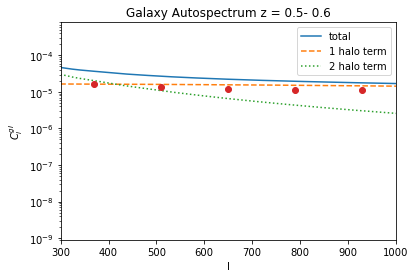

In [27]:
ells = np.arange(3000)

# 3D cross-spectra of gal x galaxies at (zs, ks)
Pgg_1h = hcos.get_power_1halo('CMASS') # put this back in hertz
Pgg_2h = hcos.get_power_2halo('CMASS') # put this back in hertz
# Project to 2D to get the Cls
Cl_gg_1h = hcos.C_gg(ells, hcos.zs, hcos.ks, Pgg_1h, gzs = zs, gdndz= np.ones_like(zs))
Cl_gg_2h = hcos.C_gg(ells, hcos.zs, hcos.ks, Pgg_2h, gzs = zs, gdndz= np.ones_like(zs))
# Plot
plt.plot(Cl_gg_1h + Cl_gg_2h, label='total', ls='-')
plt.plot(Cl_gg_1h, label='1 halo term', ls='--')
plt.plot(Cl_gg_2h, label='2 halo term', ls=':')
plt.errorbar(l56,cgg56, yerr= e56, fmt = 'o')

plt.xlabel(r'l')
plt.yscale('log')
plt.xlim([300,1000])

plt.legend()
plt.ylabel(r'$C^{gI}_l$')
plt.title('Galaxy Autospectrum z = 0.5- 0.6')
plt.show()
plt.savefig('/pscratch/sd/s/sbrisin/cibcmass/figs/0.5-.6gal.png')

.6-.8

In [28]:
zs = np.linspace(0.6,.8,20)
ms = np.geomspace(1e10,1e17,200)
ks = np.geomspace(1e-4,100,1001)
hcos = hm.HaloModel(zs,ks,ms=ms)

hcos.add_hod(name="CMASS",mthresh=10**12+zs*0.)

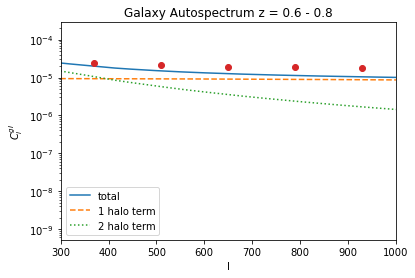

In [29]:
ells = np.arange(3000)

# 3D cross-spectra of gal x galaxies at (zs, ks)
Pgg_1h = hcos.get_power_1halo('CMASS') # put this back in hertz
Pgg_2h = hcos.get_power_2halo('CMASS') # put this back in hertz
# Project to 2D to get the Cls
Cl_gg_1h = hcos.C_gg(ells, hcos.zs, hcos.ks, Pgg_1h, gzs = zs, gdndz= np.ones_like(zs))
Cl_gg_2h = hcos.C_gg(ells, hcos.zs, hcos.ks, Pgg_2h, gzs = zs, gdndz= np.ones_like(zs))
# Plot
plt.plot(Cl_gg_1h + Cl_gg_2h, label='total', ls='-')
plt.plot(Cl_gg_1h, label='1 halo term', ls='--')
plt.plot(Cl_gg_2h, label='2 halo term', ls=':')
plt.errorbar(l68,cgg68, yerr = e68, fmt = 'o')

plt.xlabel(r'l')
plt.yscale('log')
plt.xlim([300,1000])

plt.legend()
plt.ylabel(r'$C^{gI}_l$')
plt.title('Galaxy Autospectrum z = 0.6 - 0.8')
plt.show()
plt.savefig('/pscratch/sd/s/sbrisin/cibcmass/figs/0.6-.8gal.png')